# FordGoBike Sharing System

## by Lara Alfayyadh


## Investigation Overview

The goals are :
* Understand the Pass holder Type behaviour 
* The most commen weekday by Pass holder Type 
* The peak months, strat hours and minutes for the FordGoBike Sharing System

## Dataset Overview
The data consist of approximately 311894 bike rides that happend in 2018( Jan-Dec).

The important attributes for my analysis:
* Passholder Type
* Start Time month
* Start Time day
* Start Time DayoftheWeek
* start_time_hour
* duration_min



In [27]:
# import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import glob
import os
import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 8, 9

In [28]:
path = '/Users/eng.mona/Desktop/merge'

all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)

df.to_csv('merge_file.csv', index=False)

/Users/eng.mona/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [29]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('merge_file.csv')

In [30]:
# Create copies of original dataframes to work with
df_clean = df.copy()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (12 months use of  bike share system) 
Based on our data I will show the number of bike rides for each month.

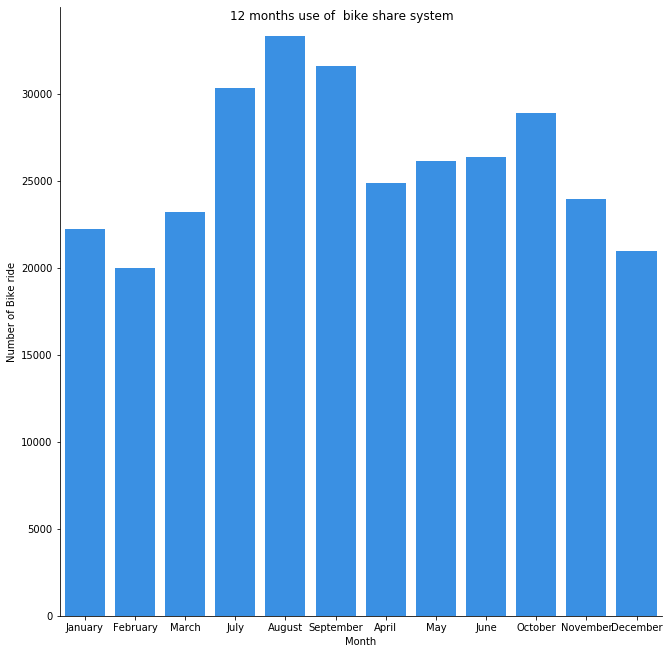

In [34]:
#Define1: change start_time and end_time to timestamps

#code
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)


# Start time month (January - Dec)
df_clean['start_time_month'] = df_clean['start_time'].dt.strftime('%B')

# monthly use of the bike sharing system
f_graph = sb.catplot(data = df_clean, x='start_time_month', kind='count', color = '#1E90FF', height = 9.2)
f_graph.set_axis_labels("Month", "Number of Bike ride")
f_graph.fig.suptitle('12 months use of  bike share system');

## (The use of each passholder type by weekday)
> In our dataset there are five types of passholder:
- Walk-up
- Monthly Pass 
- One Day Pass 
- Flex Pass 
- Annual Pass

In the next visualization I will show the number of bike rides for all pass holde type.

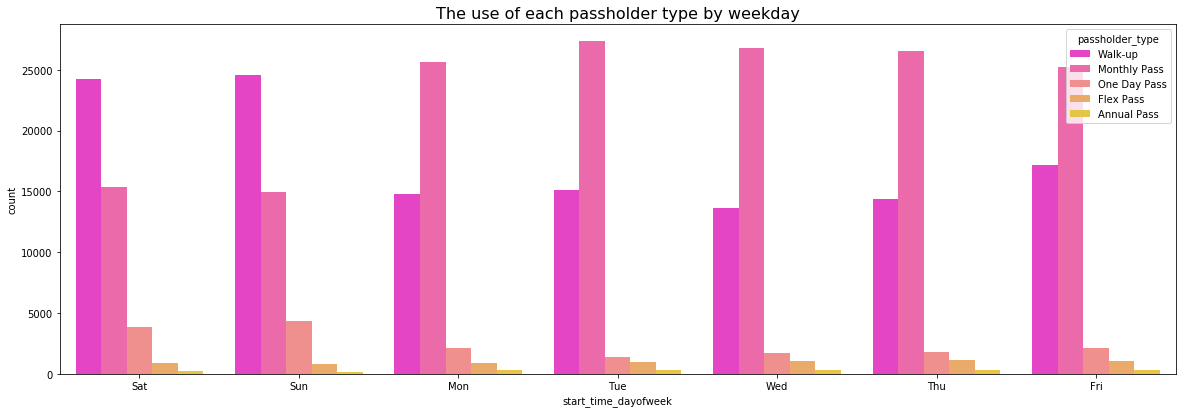

In [32]:
# get dayofweek and hours information from the start_time
df_clean['start_time_dayofweek']= df_clean['start_time'].dt.strftime('%a')

# make the fiqure size
plt.figure(figsize = [20, 45]);

# size of subplot
ax = plt.subplot(6, 1, 5);


# Setting the days into order
df_clean['start_time_dayofweek'] = pd.Categorical(df_clean['start_time_dayofweek'], 
                                                categories=['Sat','Sun','Mon','Tue','Wed', 'Thu','Fri'],  ordered=True)

# Show the number of use by day for each passholder type 
sb.countplot(data = df_clean, x = 'start_time_dayofweek', hue = 'passholder_type', palette = 'spring' ).set_title('The use of each passholder type by weekday', fontsize=16);

## (Hourly use during the weekday for Walk-up and  Monthly Pass)

The main thing I want to explore in this part of the analysis is how the three categorical measures of pass holder type into the relationship between start time hour and start time month.

For the start time hour, start time month, and pass holder type, both Walk-up and Monthly Pass are showing different trends for start time hour and start time month,.

For the Walk-up the peak time on March around 2 PM, April 4 PM, Jun 5 PM. and Monthly Pass on May at 5 PM.

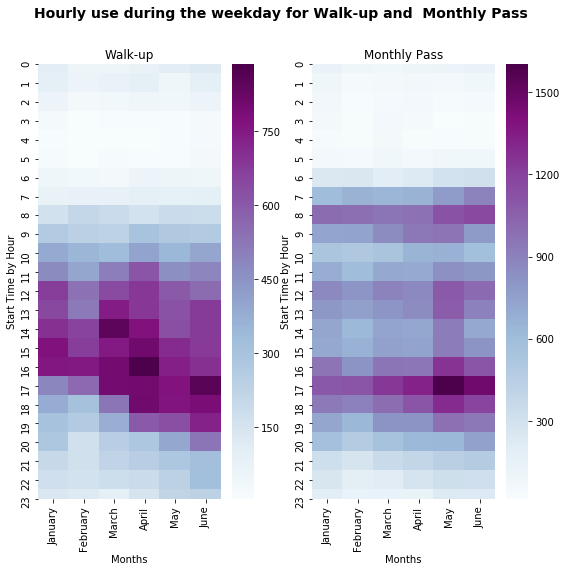

In [33]:
# get start time hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

# Setting the monthes into order
df_clean['start_time_month'] = pd.Categorical(df_clean['start_time_month'], 
                                                categories=['January','February','March','April','May', 'June'], ordered=True)

# Make the figure size
plt.figure(figsize=(9,8))
plt.suptitle('Hourly use during the weekday for Walk-up and  Monthly Pass', fontsize=14, fontweight='semibold')

# function of heatmap
def heatmap(value):

    if (value == "Walk-up"):
        plt.subplot(1, 2, 1)
        df_cus = df_clean.query('passholder_type == "Walk-up"').groupby(["start_time_hour", "start_time_month"])["bike_id"].size().reset_index()
        df_cus = df_cus.pivot("start_time_hour", "start_time_month", "bike_id")
        sb.heatmap(df_cus, cmap="BuPu")

    
    else:
        plt.subplot(1, 2, 2)
        df_subs = df_clean.query('passholder_type == "Monthly Pass"').groupby(["start_time_hour", "start_time_month"])["bike_id"].size().reset_index()
        df_subs = df_subs.pivot("start_time_hour", "start_time_month", "bike_id")
        sb.heatmap(df_subs, cmap="BuPu")

    

    plt.title(value, y=1.014)
    plt.xlabel('Months')
    plt.ylabel('Start Time by Hour');
    
# Calling the function   
heatmap("Walk-up")
heatmap("Monthly Pass")

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!